## **ANÁLISIS DESCRIPTIVO Y EXPLORATORIO**

#### **TRAYENDO DATA**


In [391]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

#LEYENDO DATOS
train=pd.read_csv("C:/Users/ugad.ingenieria2/Documents/PROYECTOS/DATASETS/Heart_Disease_Prediction.csv",sep=",")


In [392]:
#VIENDO DATOS
print(train.shape)
print(train.dtypes)
print(train.columns)
train.head(5)

(270, 14)
Age                          int64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
Heart Disease               object
dtype: object
Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [393]:
missing_values_count = train.isnull().sum() 
print(missing_values_count)

train.describe()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [394]:
#VIENDO UNICOS
columns=train.columns
for i in columns:
    print(train[i].unique())

[70 67 57 64 74 65 56 59 60 63 53 44 61 71 46 40 48 43 47 54 51 58 66 37
 50 42 62 49 52 45 41 76 39 35 55 34 38 69 68 77 29]
[1 0]
[4 3 2 1]
[130 115 124 128 120 110 140 150 135 142 134 112 132 138 160 170 144 122
 152 101 126 118 136 105 174 145 108 156 106 104  94 146 148 178 125 100
 165 180 158 200 117 192 123 129 102 155 172]
[322 564 261 263 269 177 256 239 293 407 234 226 235 303 149 311 203 211
 199 229 245 204 288 275 243 295 230 265 228 215 326 200 207 273 180 222
 223 209 233 197 218 246 225 315 205 417 195 198 166 178 249 281 126 305
 240 276 319 242 260 354 309 208 236 270 214 201 244 306 221 330 266 206
 212 302 313 141 237 289 254 274 258 160 327 304 271 283 188 286 360 267
 196 232 277 210 213 282 167 224 268 250 219 217 308 193 231 262 259 325
 299 182 294 298 409 172 184 394 174 255 248 300 318 216 252 227 220 168
 183 341 186 307 164 257 321 264 253 185 290 175 353 335 247 340 284 192]
[0 1]
[2 0 1]
[109 160 141 105 121 140 142 170 154 161 111 180 145 159 125 120 15

In [395]:
#VIENDO  NULOS
train.info()
print("Valores faltantes: ", train.isna().sum().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [396]:
#LABEL ENCONDER
le = LabelEncoder()
print(train['Heart Disease'].head())
train['Heart Disease'] = le.fit_transform(train['Heart Disease'].values)
print(train['Heart Disease'].head())

0    Presence
1     Absence
2    Presence
3     Absence
4     Absence
Name: Heart Disease, dtype: object
0    1
1    0
2    1
3    0
4    0
Name: Heart Disease, dtype: int32


FALTA PMF

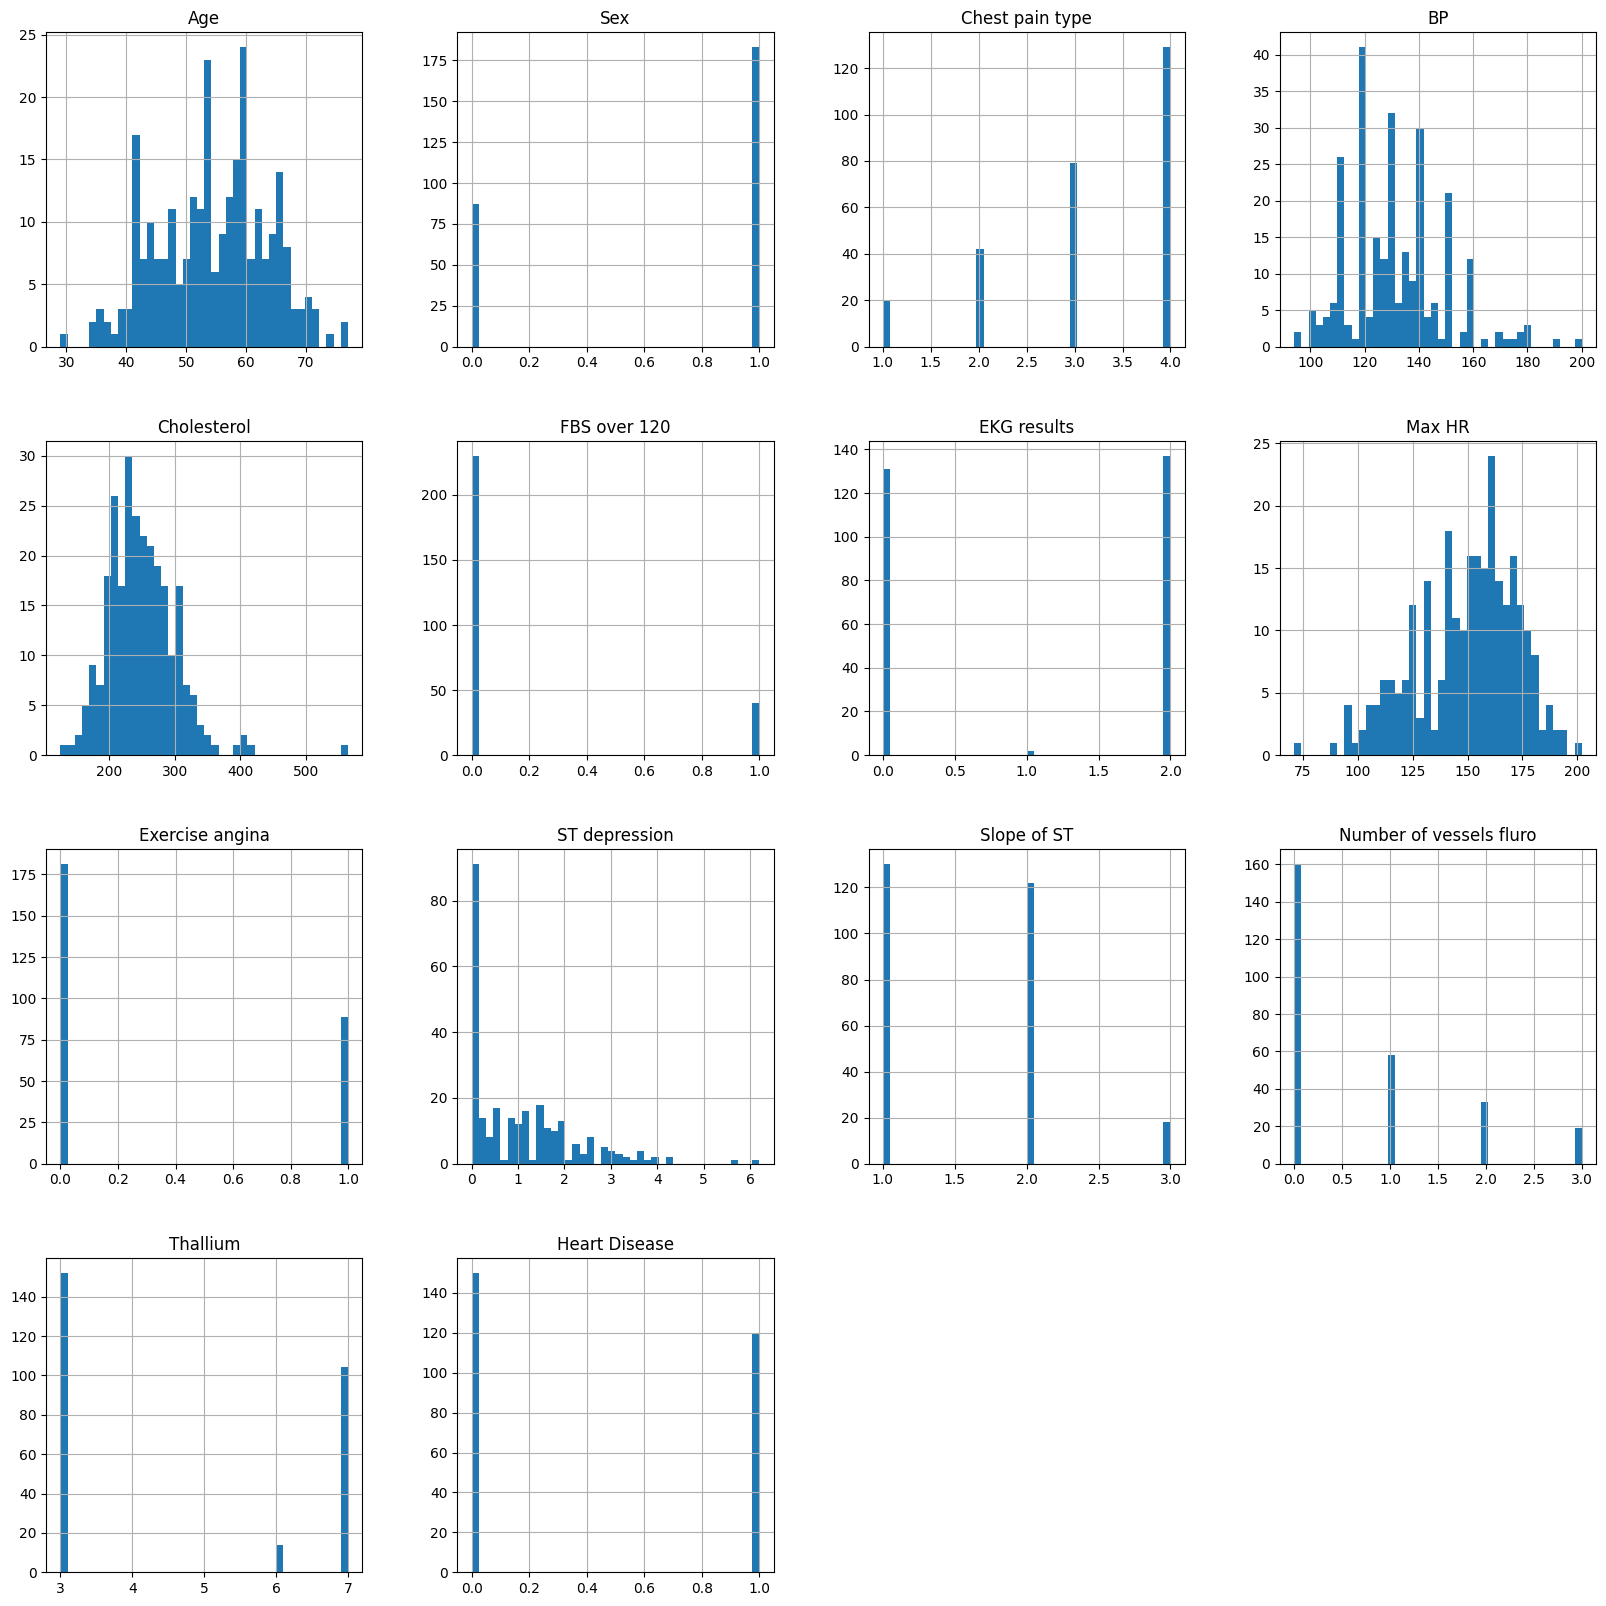

La variable Age no sigue una distribución normal (p = 0.028)
La variable Sex no sigue una distribución normal (p = 0.000)
La variable Chest pain type no sigue una distribución normal (p = 0.000)
La variable BP no sigue una distribución normal (p = 0.000)
La variable Cholesterol no sigue una distribución normal (p = 0.000)
La variable FBS over 120 no sigue una distribución normal (p = 0.000)
La variable EKG results no sigue una distribución normal (p = 0.000)
La variable Max HR no sigue una distribución normal (p = 0.000)
La variable Exercise angina no sigue una distribución normal (p = 0.000)
La variable ST depression no sigue una distribución normal (p = 0.000)
La variable Slope of ST no sigue una distribución normal (p = 0.000)
La variable Number of vessels fluro no sigue una distribución normal (p = 0.000)
La variable Thallium no sigue una distribución normal (p = 0.000)


In [397]:
#VER DISTRIBUCION DE LAS VARIABLES
train.hist(bins=40, figsize=(20,20))
plt.show()


for column in train.columns[:-1]:
    stat, p = stats.shapiro(train[column])
    if p < 0.05:
        print(f"La variable {column} no sigue una distribución normal (p = {p:.3f})")
    else:
        print(f"La variable {column} sigue una distribución normal (p = {p:.3f})")
        

C:\Users\ugad.ingenieria2\AppData\Local\Temp\ipykernel_12708\3434566392.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(train["Heart Disease"])


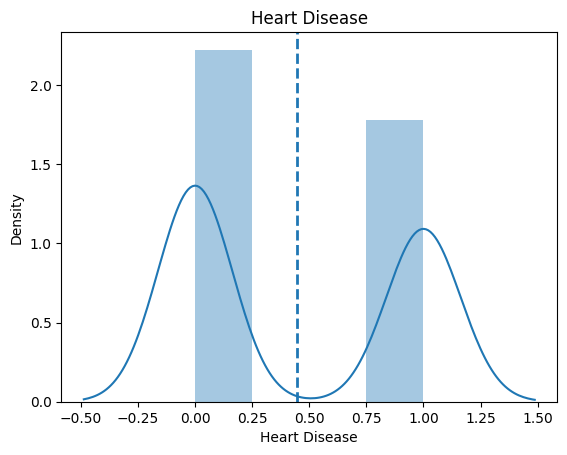

In [398]:
#VER DISTRIBUCION DE LA VARIABLE OBJETIVO
ax=sns.distplot(train["Heart Disease"])
ax.axvline(train["Heart Disease"].mean(), linestyle='--', linewidth=2)
plt.title('Heart Disease');

In [399]:
#VER INTERACCIÓN ENTRE VARIABLES
#sns.pairplot(train, hue='Heart Disease')
#plt.show()


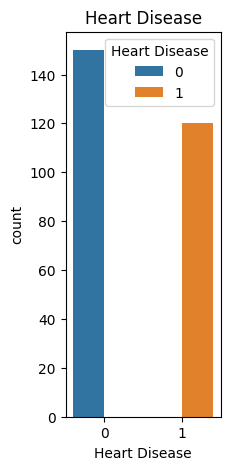

In [400]:
#VER DATOS DE LA VARIABLE OBJETIVO

plt.figure(figsize=(2, 5))
ax=sns.countplot(x="Heart Disease",data=train,hue='Heart Disease')
ax.set_title("Heart Disease")
plt.show()

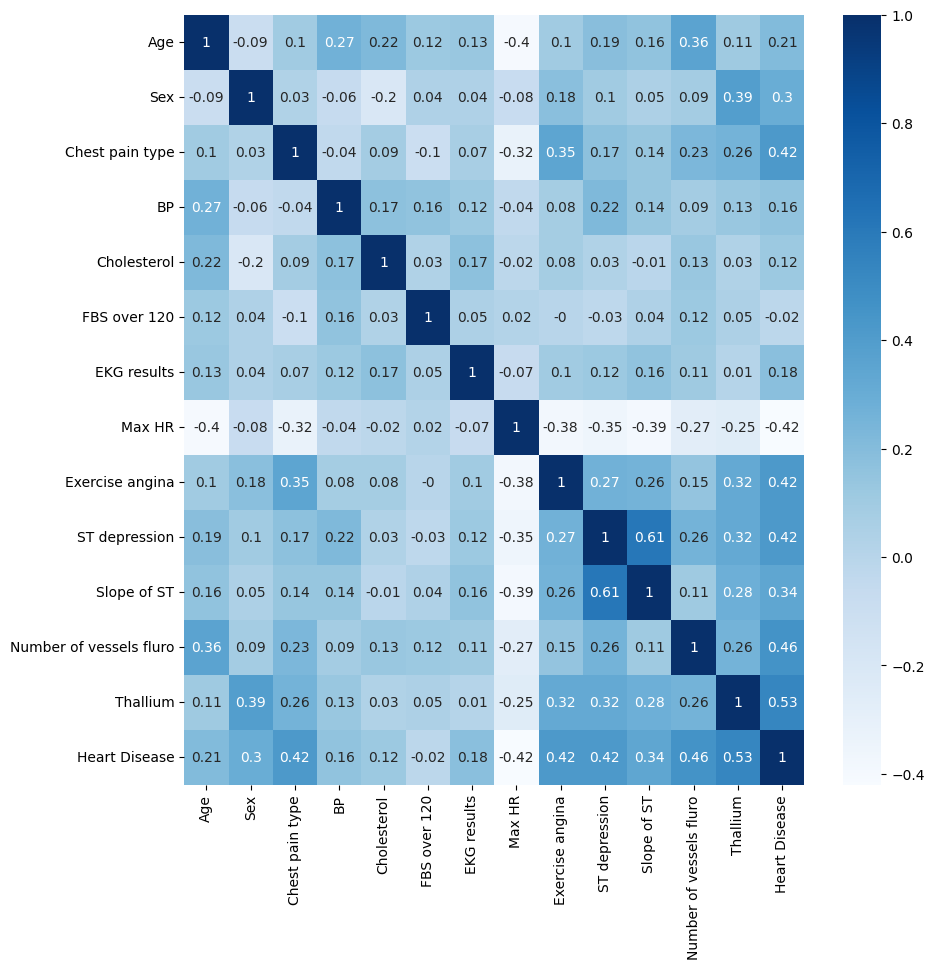

In [401]:
#VER CORRELACIÓN ENTRE VARIABLES
correlacion = train
correlacion=correlacion.corr().round(2)
#correlacion = correlacion.loc[:,['parental level of education']]
#correlacion = correlacion.sort_values(by='parental level of education', ascending=False)
fig, ax = plt.subplots(figsize=(10,10))
ax=sns.heatmap(correlacion, annot=True,cmap="Blues")

#### ESTABLECEMOS LAS VARIABLES

In [402]:


#ESTABLECEMOS LA VARIABLE OBJETIVO Y LAS VARIABLES DEPENDIENTES
y=train["Heart Disease"]
X=train.drop("Heart Disease", axis=1)


## **ANÁLISIS DE SELECCIÓN DE CARACTERISTICAS**

#### **SELECCIONANDO VARIABLES POR CORRELACIÓN**

In [403]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
reg = LogisticRegression(max_iter=1000)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
ACC_ANTES = np.sqrt(accuracy_score(y_test, y_pred))

print("ACURACCY ANTES DE LA SELECCIÓN POR CORRELACIÓN: "+str(ACC_ANTES))


#ELIMINAMOS LAS VARIABLES QUE NO USAREMOS
#X=X.drop("Id",axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
reg = LogisticRegression(max_iter=1000)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
ACC_CORRELA = np.sqrt(accuracy_score(y_test, y_pred))

print("ACURACCY DESPUES DE LA SELECCIÓN POR CORRELACIÓN: "+str(ACC_CORRELA))

ACURACCY ANTES DE LA SELECCIÓN POR CORRELACIÓN: 0.9094836413191612
ACURACCY DESPUES DE LA SELECCIÓN POR CORRELACIÓN: 0.9094836413191612


#### **SELECCIONANDO VARIABLES CON RFE**

In [404]:

from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# CREAMOS UN OBJETO DE REGRESIÓN LINEAL
modelo = LogisticRegression(max_iter=1000)

Lista_Accuracy = []
Posicion_Accuracy = []
elementos=len(X.columns)


#COMENZAREMOS A ITERAR PARA VER CON QUE CANTIDAD DE VARIABLES SE TIENE EL MEJOR ACCURACY
for i in range(elementos):
    # CREAMOS UN OBJETO RFE PARA SELECCIONAR n CARACTERÍSTICAS
    rfe = RFE(modelo,n_features_to_select=i+1)

    # AJUSTAMOS EL MODELO RFE AL CONJUNTO DE DATOS
    #POR QUE SOLO A X_rfe
    X_rfe = rfe.fit_transform(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X_rfe, y,test_size=0.3,random_state=42)

    #ENTRENAMOS EL NUEVO MODELO
    modelo.fit(X_train, y_train)

    y_pred = modelo.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    Lista_Accuracy.append(accuracy)
    print("Con "+str(i+1)+" variables se obtiene un Accuracy de "+str(accuracy))
    extra = i+1
    Posicion_Accuracy.append(extra)

posicion=pd.Series(Lista_Accuracy).idxmax()
ACURACCY_RFE=max(Lista_Accuracy)
cant_var_usar=Posicion_Accuracy[posicion]

#ESTA VEZ APLCIAREMOS OTRA VEZ RFE PERO PARA PODER EXTRAER LAS VARIABLES A FILTRAR
rfe = RFE(modelo,n_features_to_select=cant_var_usar)
X_rfe = rfe.fit_transform(X, y)
cabeceras_nuevas=X.columns[(rfe.get_support())]

X=X[cabeceras_nuevas]

#APLICAMOS EL MODELO 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

reg = LogisticRegression(max_iter=1000)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
ACC_NUEVO = np.sqrt(accuracy_score(y_test, y_pred))

print("LA CANTIDAD DE VARIABLES IDEAL A USAR SERÁ DE: ",cant_var_usar)
print("VARIABLES SELECCIONADAS POR RFE: ",cabeceras_nuevas)
print("ACURACCY DESPUES DEL RFE: "+str(ACC_NUEVO))


Con 1 variables se obtiene un Accuracy de 0.6666666666666666
Con 2 variables se obtiene un Accuracy de 0.6666666666666666
Con 3 variables se obtiene un Accuracy de 0.691358024691358
Con 4 variables se obtiene un Accuracy de 0.8148148148148148
Con 5 variables se obtiene un Accuracy de 0.8024691358024691
Con 6 variables se obtiene un Accuracy de 0.7901234567901234
Con 7 variables se obtiene un Accuracy de 0.7901234567901234
Con 8 variables se obtiene un Accuracy de 0.8395061728395061
Con 9 variables se obtiene un Accuracy de 0.8641975308641975
Con 10 variables se obtiene un Accuracy de 0.8518518518518519
Con 11 variables se obtiene un Accuracy de 0.8395061728395061
Con 12 variables se obtiene un Accuracy de 0.8395061728395061
Con 13 variables se obtiene un Accuracy de 0.8271604938271605
LA CANTIDAD DE VARIABLES IDEAL A USAR SERÁ DE:  9
VARIABLES SELECCIONADAS POR RFE:  Index(['Sex', 'Chest pain type', 'FBS over 120', 'EKG results',
       'Exercise angina', 'ST depression', 'Slope of ST'

#### **ITERANDO TODOS LOS MODELOS QUE SE ADAPTAN A NUESTRO PROBLEMA PARA HALLAR EL MEJOR**

In [405]:
# YA CON LA DATA TRANSFORMADA, PROCEDEREMOS A ITERAR LOS MODELOS QUE SE AJUSTEN A NUESTRO PROBLEMA PARA ENCONTRAR EL MEJOR
from sklearn.model_selection import cross_val_predict
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


modelos = {
    "LogisticRegression":LogisticRegression(max_iter=1000),
    "KNeighborsClassifier":KNeighborsClassifier(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "RandomForestClassifier":RandomForestClassifier(),
    "SVC":SVC(),
    #"GaussianNB":GaussianNB(),
    "BernoulliNB":BernoulliNB(),
    "MultinomialNB":MultinomialNB(),
    "MLPClassifier":MLPClassifier(),
    "GradientBoostingClassifier":GradientBoostingClassifier(),
    "XGBClassifier":xgb.XGBClassifier(),
    "LGBMClassifier":lgb.LGBMClassifier()
}


#CREANDO LAS LISTAS
modelo_resultado = []
modelo_nombre = []

# ENTRENANDO EL MODELO
for nombre,modelo in modelos.items():
    a = modelo.fit(X_train,y_train)
    predicted = a.predict(X_test)
    score = np.sqrt(accuracy_score(y_test, predicted))
    modelo_resultado.append(score)
    modelo_nombre.append(nombre)
    
    #CREANDO LA LISTA DE RESULTADOS
    df_resultados = pd.DataFrame([modelo_nombre,modelo_resultado])
    df_resultados = df_resultados.transpose()
    df_resultados = df_resultados.rename(columns={0:'Model',1:'ACCURACY'}).sort_values(by='ACCURACY',ascending=False)
    
print(df_resultados)

ACCURACY_TOPMODELO=df_resultados["ACCURACY"].max()
df_resultados=df_resultados.reset_index()
df_resultados=df_resultados.drop("index", axis=1)
df_resultados=df_resultados.set_index("ACCURACY")
df_resultados=df_resultados.iloc[0,0]
print("EL MEJOR MODELO PARA EL PROBLEMA ES: "+ df_resultados)
print("RMSE DESPUES DE SELECCIONAR EL MEJOR MODELO: "+str(ACCURACY_TOPMODELO))

                         Model  ACCURACY
0           LogisticRegression  0.929622
1         KNeighborsClassifier  0.929622
3       RandomForestClassifier  0.909484
4                          SVC  0.909484
7                MLPClassifier  0.895806
10              LGBMClassifier  0.895806
8   GradientBoostingClassifier  0.888889
9                XGBClassifier  0.881917
5                  BernoulliNB   0.87489
2       DecisionTreeClassifier  0.853461
6                MultinomialNB  0.816497
EL MEJOR MODELO PARA EL PROBLEMA ES: LogisticRegression
RMSE DESPUES DE SELECCIONAR EL MEJOR MODELO: 0.9296222517045284


c:\Users\ugad.ingenieria2\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#### **REALIZAMOS LA VALIDACIÓN DEL MODELO**

In [406]:
#CREAREMOS EL MODELO GANADOR
modelo=modelos[df_resultados]

#PROCEDEREMOS A REALIZAR LA VALIDACIÓN CRUZADA PARA COMPARAR LOS RMSE
prediccion = cross_val_predict(modelo, X, y, cv=3)
ACCURACY_TEST = np.sqrt(accuracy_score(y, prediccion))

#VEMOS QUE LA DIFERENCIA DE RMSE NO ES TAN GRANDE, LO QUE INDICA QUE NUESTRO MODELO ESTÁ EN BUEN CAMINO
APRUEBA=ACCURACY_TOPMODELO-ACCURACY_TEST
print("El RMSE DEL TRAIN ES: "+str(ACCURACY_TOPMODELO))
print("El RMSE DEL TEST ES: "+str(ACCURACY_TEST))
print("LA DIFERENCIA DE AMBOS ES: "+str(APRUEBA))



El RMSE DEL TRAIN ES: 0.9296222517045284
El RMSE DEL TEST ES: 0.9269623828717427
LA DIFERENCIA DE AMBOS ES: 0.0026598688327856834
